# データ準備

## デフォルトインポート
いつも使用するモジュールのインポート

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

## データセットの準備
bostonデータセットをインストール

In [2]:
from sklearn.datasets import load_boston 
boston = load_boston()

# データの分析
ボストンデータセットについて、データの目的を確認する。また、データフレームやグラフに落とし込んで分析する事で、モデルを構築する上で必要だと考えられるデータを抽出する。

## データの目的と説明変数の意味の確認

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- 目的の確認と目的変数
  - 目的変数  
      MEDV：住宅価格の中央値
  - 目的  
      ボストン内の特定の条件の住宅の価格を求める。(回帰問題)
- 説明変数
    - CRIM: 町の犯罪率(犯罪率=一定期間の犯罪数を人口で割ったもの)
    - ZN: 2500フィートを超える区画を持つ住宅の割合
    - INDUS: 非上場の小売りエーカーの割合（農場の割合的な何かみたい）
    - CHAS: Charlesの河川変数(境界線なら1, それ以外なら0)
    - NOX: 一酸化窒素濃度
    - RM: 住居の平均部屋数
    - AGE: 1940年以前に建築された建物の割合
    - DIS: 5つのボストン雇用センターまでの距離
    - RAD: 放射状高速道路までのアクセスのインデックス
    - TAX: 10000ドルごとの固定資産税
    - PTRATIO: 町ごとの教師と生徒の比率
    - B: 黒人の割合
    - LSTAT: 低所得者割合

## データフレームに落とし込んで内部の情報（欠損値がないかなど）を確認する

In [4]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

df_boston['MEDV'] = boston.target

df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df_boston.info()
df_boston.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

欠損値はなし。データ数は506個。

## ヒートマップで相関係数を確認する
回帰問題なので、目的変数MEDVと相関係数の絶対値が大きいものを抽出できればうまく評価できる可能性が高いと思われる。  
そこで、ヒートマップで確認してみる。

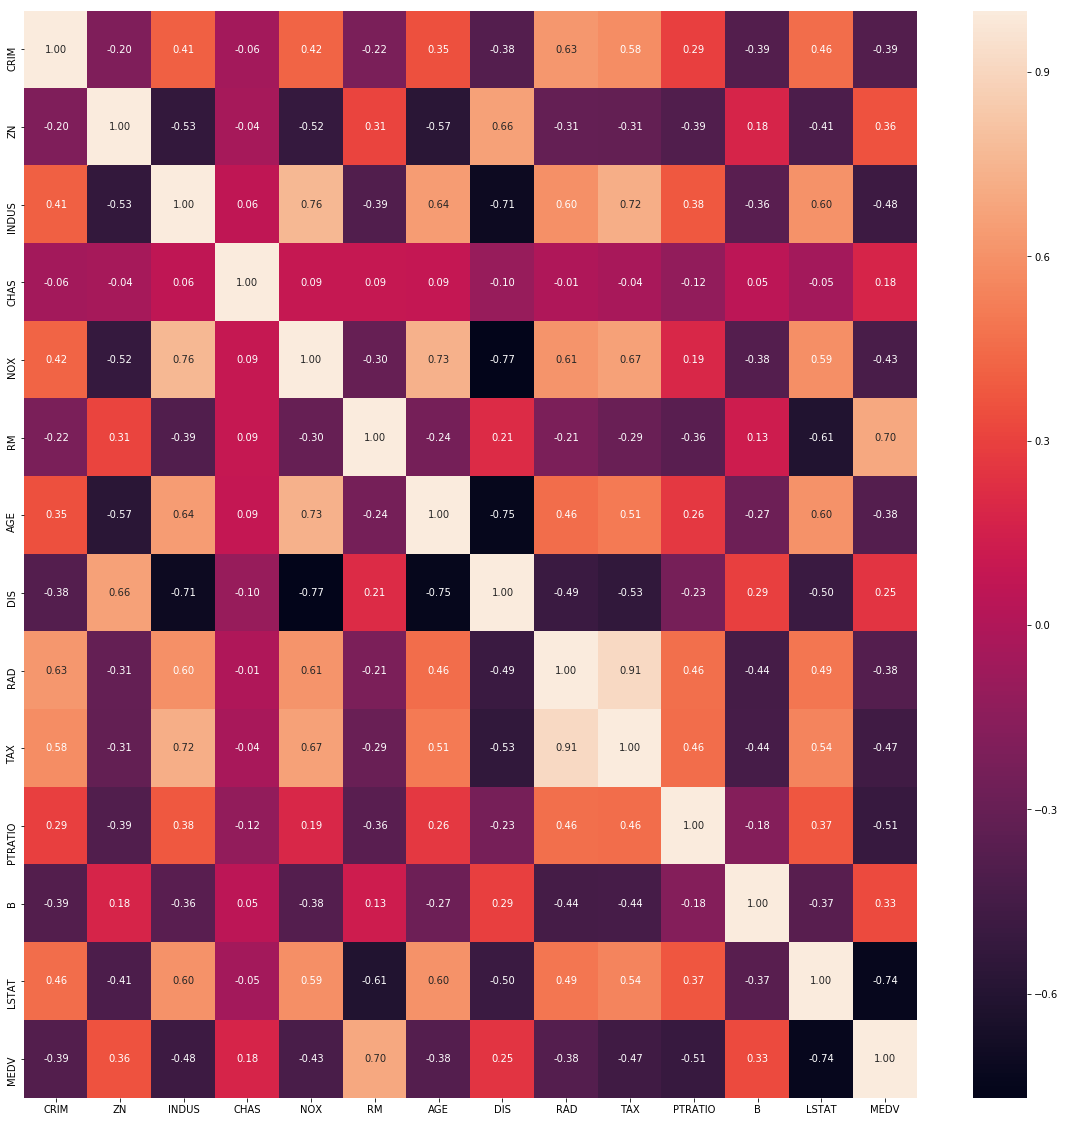

In [6]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_boston.corr(), fmt='.2f', annot=True)

相関係数の絶対値が0.6以上のものをピックアップしてみる。また相関関係をペアプロットで確認してみる。

      RM  LSTAT  MEDV
0  6.575   4.98  24.0
1  6.421   9.14  21.6
2  7.185   4.03  34.7
3  6.998   2.94  33.4
4  7.147   5.33  36.2


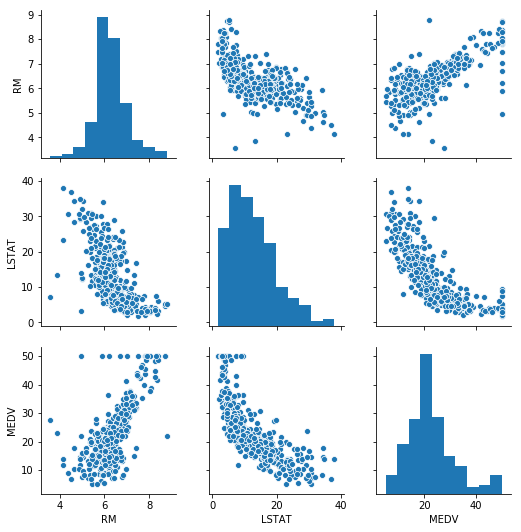

In [7]:
df_boston_Hi_corr = df_boston.loc[:,abs(df_boston.corr()['MEDV'])>0.6]
print(df_boston_Hi_corr.head())
sns.pairplot(df_boston_Hi_corr)

# モデルの作成①
選んだデータ2つのデータから住宅料金の中央値を推測するモデルを作成してみる。

## モデルの学習

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 回帰モデルの準備
lr = LinearRegression()

# データセットを学習データとテストデータに分類_
X_train, X_test, y_train, y_test = train_test_split(df_boston_Hi_corr.iloc[:,:2], df_boston_Hi_corr.iloc[:,2], random_state=1)

# 学習の実施
lr.fit(X_train, y_train)

# モデルの評価
print('決定係数: ', lr.score(X_test, y_test))
print('RMSE: ', mean_squared_error(lr.predict(X_test), y_test) ** 0.5)
print('MAE: ', mean_absolute_error(lr.predict(X_test), y_test))

# 回帰直線の係数を確認
print(f'回帰直線: (predict MEDV) = {lr.coef_[0]}(RM) + {lr.coef_[1]}(LSTAT)')

決定係数:  0.6873549116447073
RMSE:  5.56508267841118
MAE:  4.323063168123561
回帰直線: (predict MEDV) = 4.204794367441982(RM) + -0.6666376817721776(LSTAT)


## モデルの評価
決定係数だけ見てもどれくらいできているのかよくわからないので、
テストデータのMEDVと予測されたpred_MEDVをプロットしてどれだけうまく推測できているかを確認する。

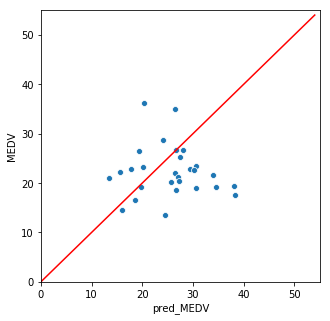

In [9]:
# 予測結果の計算
df_predMEDV = pd.DataFrame()
df_predMEDV['pred_MEDV'] = lr.predict(X_test)

# 縦軸を真値、横軸を推測値としてプロット
plt.figure(figsize=[5,5])
plt.xlim(0, 55)
plt.ylim(0, 55)
fig = sns.scatterplot(df_predMEDV['pred_MEDV'], y_test)

# y=x の線を記述(予測と真値の差: 0)
x = np.arange(0, 55)
fig.plot(x, x, color = "red")

- 考察：  
    - 今回はモデルに線形回帰を用いているが、LSTATはどちらかというと2次曲線的な回帰を当てはめるほうが良いように感じる。これによってうまく回帰できていないのではないか。  
    - 提案：LSTATの平方根の値を新たにRootLSTATとして評価してみる

# モデル構築②(RootLSTAT)

## 新しい評価指標RootLSTATの作成
3.2の結果をもとに、RootLSTATを新しい評価指標として作成して、相関係数を計算してみる。

前
              RM     LSTAT      MEDV
RM     1.000000 -0.613808  0.695360
LSTAT -0.613808  1.000000 -0.737663
MEDV   0.695360 -0.737663  1.000000


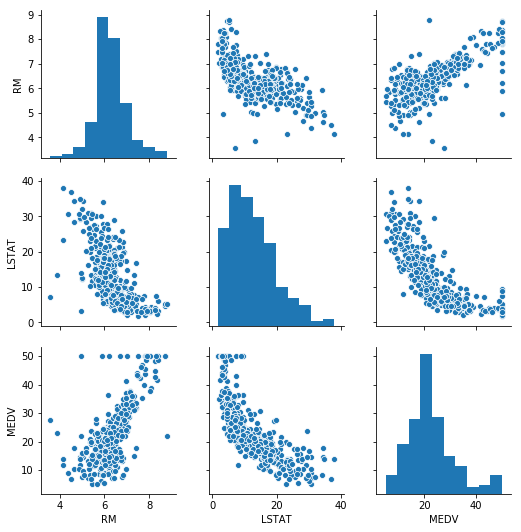

後
              RM     LSTAT      MEDV
RM     1.000000 -0.644529  0.695360
LSTAT -0.644529  1.000000 -0.785109
MEDV   0.695360 -0.785109  1.000000


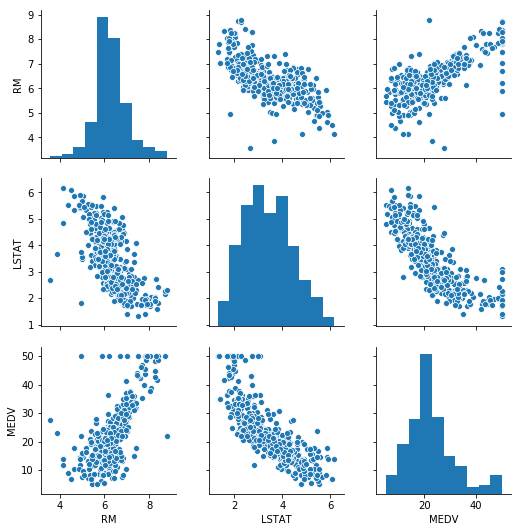

In [10]:
# RootLSTATをコピーして作成
df_boston_root_lstat = df_boston_Hi_corr.copy()
df_boston_root_lstat['LSTAT'] = df_boston_root_lstat['LSTAT']**0.5

# 相関係数をもとのLSTATと比較
print('前\n',df_boston_Hi_corr.corr())
sns.pairplot(df_boston_Hi_corr)
plt.show()

print('後\n',df_boston_root_lstat.corr())
sns.pairplot(df_boston_root_lstat)
plt.show()

## 新しい評価指標で学習させてみる

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 回帰モデルの準備
lr2 = LinearRegression()

# データセットを学習データとテストデータに分類
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_boston_root_lstat.iloc[:,:2], df_boston_root_lstat.iloc[:,2], random_state=1)

# 学習の実施
lr2.fit(X_train2, y_train2)

# モデルの評価
print('決定係数: ', lr2.score(X_test2, y_test2))
print('RMSE: ', mean_squared_error(lr2.predict(X_test2), y_test2) ** 0.5)
print('MAE: ', mean_absolute_error(lr2.predict(X_test2), y_test2))

# 回帰直線の係数を確認
print(f'回帰直線: (predict MEDV) = {lr2.coef_[0]}(RM) + {lr2.coef_[1]}(Root_LSTAT)')

決定係数:  0.7143398327029452
RMSE:  5.319498108700517
MAE:  4.085684362273428
回帰直線: (predict MEDV) = 3.350852102328178(RM) + -5.586524918628243(Root_LSTAT)


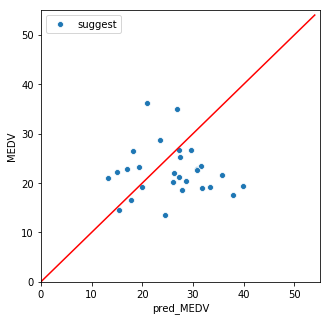

In [74]:
# 予測結果の計算
df_predMEDV2 = pd.DataFrame()
df_predMEDV2['pred_MEDV'] = lr2.predict(X_test2)

# 縦軸を真値、横軸を推測値としてプロット
plt.figure(figsize=[5,5])
plt.xlim(0, 55)
plt.ylim(0, 55)
fig = sns.scatterplot(df_predMEDV2['pred_MEDV'], y_test2, label='suggest')

# y=x の線を記述(予測と真値の差: 0)
x = np.arange(0, 55)
fig.plot(x, x, color = "red")

## 結果の比較

In [73]:
for i in range(0, 127):
    print(f'True: {y_test.iat[i]} old: {df_predMEDV.iat[i,0]} suggest: {df_predMEDV2.iat[i,0]}')

True: 28.2 old: 28.443147308717627 suggest: 28.31913640124789
True: 23.9 old: 28.03313695911927 suggest: 28.166967585268736
True: 16.6 old: 17.486414048210204 suggest: 16.682090394207446
True: 22.0 old: 23.980308499321325 suggest: 24.495827056084938
True: 20.8 old: 20.41736185081741 suggest: 20.83313441865992
True: 23.0 old: 24.044231117885683 suggest: 23.421479708463984
True: 27.9 old: 29.408881981663097 suggest: 30.80389907298847
True: 14.5 old: 21.50284845865051 suggest: 20.871954307494406
True: 21.5 old: 17.7408764531418 suggest: 16.991078908482663
True: 22.6 old: 25.773379909314304 suggest: 25.61974052039158
True: 23.7 old: 27.886878753168716 suggest: 27.77510849937042
True: 31.2 old: 30.494849198678438 suggest: 31.73802672001721
True: 19.3 old: 19.689030100742656 suggest: 19.293121606273402
True: 19.4 old: 22.17106757289164 suggest: 22.213548428499557
True: 19.4 old: 22.176775274585125 suggest: 21.756048611234313
True: 27.9 old: 20.15846416257011 suggest: 20.03379311735359
True: 

グラフに書き出してみる。  
本当はよくないが、多くのデータに対する予測結果を可視化したほうが見やすそうなので、全部のデータを使って、可視化する

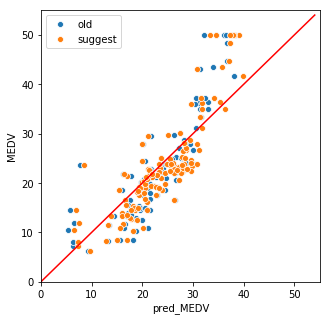

In [79]:
# 予測結果の計算
df_predMEDV = pd.DataFrame()
df_predMEDV['pred_MEDV'] = lr.predict(df_boston_Hi_corr.iloc[:,:2])

df_predMEDV2 = pd.DataFrame()
df_predMEDV2['pred_MEDV'] = lr2.predict(df_boston_root_lstat.iloc[:,:2])

# 縦軸を真値、横軸を推測値としてプロット
plt.figure(figsize=[5,5])
plt.xlim(0, 55)
plt.ylim(0, 55)
fig = sns.scatterplot(df_predMEDV['pred_MEDV'], y_test, label='old')
fig = sns.scatterplot(df_predMEDV2['pred_MEDV'], y_test2, label='suggest')

# y=x の線を記述(予測と真値の差: 0)
x = np.arange(0, 55)
fig.plot(x, x, color = "red")

In [80]:
# モデルの評価
print(f'決定係数: old={lr.score(X_test, y_test)} suggest={lr2.score(X_test2, y_test)}')
print(f'RMSE: old={mean_squared_error(lr.predict(X_test), y_test) ** 0.5} suggest={mean_squared_error(lr2.predict(X_test2), y_test2) ** 0.5}')
print(f'MAE: old={mean_absolute_error(lr.predict(X_test), y_test)} suggest={mean_absolute_error(lr2.predict(X_test2), y_test)}')

決定係数: old=0.6873549116447073 suggest=0.7143398327029452
RMSE: old=5.56508267841118 suggest=57.100527739701555
MAE: old=4.323063168123561 suggest=47.01422096946023
